script

1020.1000310655483 1039.9252873563219


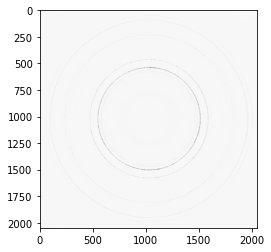

In [3]:
import os
import skimage.io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageEnhance
original= Image.open('/home/zxu4/CSE_MSE_RXF131/staging/mdle/D-waam/DonBrown-HDD1/strantza-721-1/PB1-HT1-cat/ff_002566_ge2_0001.tiff')
orig = np.array(original)
aa = Image.fromarray((orig))
plt.imshow(orig,cmap = 'binary')

import imageio as iio
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops

threshold_value = filters.threshold_otsu(orig)
labeled_foreground = (aa > threshold_value).astype(int)
properties = regionprops(labeled_foreground, orig)
center_of_mass = properties[0].centroid
weighted_center_of_mass = properties[0].weighted_centroid

print(center_of_mass[0],center_of_mass[1])

In [5]:
import os
import pandas as pd

# folder path
dir_path = r'/home/zxu4/CSE_MSE_RXF131/staging/mdle/D-waam/DonBrown-HDD1/strantza-721-1/PB1-HT1-cat'

# list to store files
filenames = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        filenames.append(path)
files = pd.DataFrame(filenames)
files.to_csv('FindCenterJobsList.csv',header=False)

In [6]:
files

,0
0,ff_003441_ge2_0001.tiff
1,ff_002814_ge2_0001.tiff
2,ff_002663_ge2_0001.tiff
3,ff_002953_ge2_0001.tiff
4,ff_003374_ge2_0001.tiff
...,...
1075,ff_002748_ge2_0001.tiff
1076,ff_003109_ge2_0001.tiff
1077,ff_002824_ge2_0001.tiff
1078,ff_002765_ge2_0001.tiff


In [2]:
import os
import pandas as pd
column_names = ["x","y"]
findcenter = pd.DataFrame(columns = column_names)
for file1 in os.listdir('/home/zxu4/slurm_8/'):
    try:
        line = open(os.path.join('/home/zxu4/slurm_8/',file1)).readlines()[-2][:-1]
        line1 = []
        line1.append(line)
        new_items = []
        [new_items.extend(item.split()) for item in line1]
        for i in range(len(new_items)):
            new_items[i] = float(new_items[i])
        findcenter.loc[len(findcenter.index)] = new_items 
    except:
        new_items = ['error','error']
        findcenter.loc[len(findcenter.index)] = new_items 

In [3]:
findcenter.to_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_find_center_tr1.csv')

In [69]:
jobs = pd.read_csv('FindCenterJobsList.csv',header = None)
jobs.loc[563]

0              563
1    ff_002788.chi
Name: 563, dtype: object

In [4]:
import pandas as pd
run1data = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_1/run_v0_1/run_v0_1_summary.csv',index_col =0)

In [5]:
def section(string):
    gr = string[0][82:]
    gr = gr[:gr.find('/')]
    return gr
run1data['group'] = run1data.apply(section, axis=1)
run1data

,file_path,center,ratio,group
0,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.025,ti64_PB2_darkCor
1,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB2_darkCor
2,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1020,1022)",1.015,ti64_PB2_darkCor
3,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB2_darkCor
4,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.025,ti64_PB2_darkCor
...,...,...,...,...
3035,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1019,1013)",1.010,ti64_PB3_darkCor
3036,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1027,1021)",1.045,ti64_PB3_darkCor
3037,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1026,1021)",1.045,ti64_PB3_darkCor
3038,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.035,ti64_PB3_darkCor


In [31]:
pb1 = run1data[run1data.group == 'ti64_PB1_darkCor']

In [32]:
def sep1(string):
    gr = string[1][1:]
    gr = gr[:gr.find(',')]
    return float(gr)

def sep2(string):
    gr = string[1]
    gr = gr[(gr.find(',')+1):-1]
    return float(gr)

pb1['x1'] = pb1.apply(sep1, axis=1)
pb1['y1'] = pb1.apply(sep2, axis=1)
pb1

/tmp/ipykernel_260971/3047574867.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb1['x1'] = pb1.apply(sep1, axis=1)
/tmp/ipykernel_260971/3047574867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb1['y1'] = pb1.apply(sep2, axis=1)


,file_path,center,ratio,group,x1,y1
101,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB1_darkCor,1025.0,1021.0
102,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB1_darkCor,1025.0,1021.0
103,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.030,ti64_PB1_darkCor,1025.0,1021.0
104,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB1_darkCor,1025.0,1021.0
105,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1027,1032)",1.025,ti64_PB1_darkCor,1027.0,1032.0
...,...,...,...,...,...,...
2832,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.030,ti64_PB1_darkCor,1025.0,1021.0
2833,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1026,1032)",1.020,ti64_PB1_darkCor,1026.0,1032.0
2834,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.030,ti64_PB1_darkCor,1025.0,1021.0
2835,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1026,1032)",1.020,ti64_PB1_darkCor,1026.0,1032.0


In [8]:
findcenter = findcenter.drop(563)
findcenter

,x,y
0,1034.950691,1041.449143
1,1020.022545,1036.847336
2,1026.312397,1040.014813
3,1024.59831,1046.879502
4,1034.262028,1044.727204
...,...,...
1075,1026.559333,1031.3195
1076,1028.196998,1050.113341
1077,1019.598363,1038.075618
1078,1026.398091,1031.92698


In [9]:
findcenter = findcenter.drop(1068)
findcenter['x'] = findcenter['x'].astype(float)
findcenter['y'] = findcenter['y'].astype(float)
findcenter

,x,y
0,1034.950691,1041.449143
1,1020.022545,1036.847336
2,1026.312397,1040.014813
3,1024.598310,1046.879502
4,1034.262028,1044.727204
...,...,...
1075,1026.559333,1031.319500
1076,1028.196998,1050.113341
1077,1019.598363,1038.075618
1078,1026.398091,1031.926980


In [10]:
findcenter = findcenter.round()
findcenter

,x,y
0,1035.0,1041.0
1,1020.0,1037.0
2,1026.0,1040.0
3,1025.0,1047.0
4,1034.0,1045.0
...,...,...
1075,1027.0,1031.0
1076,1028.0,1050.0
1077,1020.0,1038.0
1078,1026.0,1032.0


In [11]:
findcenter = findcenter[findcenter.x<1050]

In [17]:
len(findcenter)

1076

In [35]:
pb1  = pb1[pb1.x1 > 1022]
pb1 = pb1[pb1.x1 < 1027]

In [36]:
len(pb1)

990

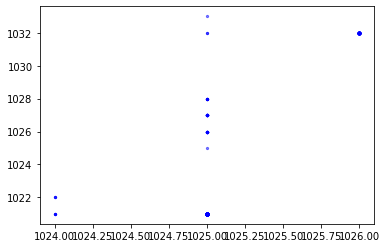

In [37]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.scatter(pb1.x1,pb1.y1,c = 'blue',s = 5,alpha = 0.5)
plt.show()

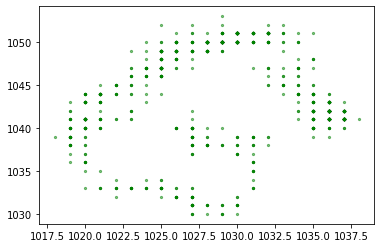

In [15]:
plt.scatter(findcenter.x,findcenter.y,c = 'green',s = 5,alpha = 0.5)
plt.show()

In [108]:
jobs = pd.read_csv('FindCenterJobsList.csv',header = None, index_col = 0)
jobs.columns = ['image']
jobs

,image
0,
0,ff_003441_ge2_0001.tiff
1,ff_002814_ge2_0001.tiff
2,ff_002663_ge2_0001.tiff
3,ff_002953_ge2_0001.tiff
4,ff_003374_ge2_0001.tiff
...,...
1075,ff_002748_ge2_0001.tiff
1076,ff_003109_ge2_0001.tiff
1077,ff_002824_ge2_0001.tiff


In [114]:
def getim(string):
    ret = string[0]
    ret = ret[ret.rfind('/')+9:]
    return ret
pb1['image'] = pb1.apply(getim,axis =1)
pb1


/tmp/ipykernel_159041/1025486654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb1['image'] = pb1.apply(getim,axis =1)


,file_path,center,ratio,group,x1,y1,image
101,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB1_darkCor,1025,1021,ff_003016_ge2_0001.tiff
102,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB1_darkCor,1025,1021,ff_002966_ge2_0001.tiff
103,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.030,ti64_PB1_darkCor,1025,1021,ff_002669_ge2_0001.tiff
104,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB1_darkCor,1025,1021,ff_003266_ge2_0001.tiff
105,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1027,1032)",1.025,ti64_PB1_darkCor,1027,1032,ff_003407_ge2_0001.tiff
...,...,...,...,...,...,...,...
2832,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.030,ti64_PB1_darkCor,1025,1021,ff_002688_ge2_0001.tiff
2833,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1026,1032)",1.020,ti64_PB1_darkCor,1026,1032,ff_003530_ge2_0001.tiff
2834,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.030,ti64_PB1_darkCor,1025,1021,ff_002643_ge2_0001.tiff
2835,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1026,1032)",1.020,ti64_PB1_darkCor,1026,1032,ff_003529_ge2_0001.tiff


In [116]:
check1 = pd.merge(jobs, pb1,on  =   'image')
check1

,image,file_path,center,ratio,group,x1,y1
0,ff_003441_ge2_0001.tiff,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1027,1032)",1.020,ti64_PB1_darkCor,1027,1032
1,ff_002814_ge2_0001.tiff,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.035,ti64_PB1_darkCor,1025,1021
2,ff_002663_ge2_0001.tiff,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.030,ti64_PB1_darkCor,1025,1021
3,ff_002953_ge2_0001.tiff,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB1_darkCor,1025,1021
4,ff_003374_ge2_0001.tiff,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1027)",1.020,ti64_PB1_darkCor,1025,1027
...,...,...,...,...,...,...,...
1073,ff_002748_ge2_0001.tiff,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.035,ti64_PB1_darkCor,1025,1021
1074,ff_003109_ge2_0001.tiff,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.040,ti64_PB1_darkCor,1025,1021
1075,ff_002824_ge2_0001.tiff,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.035,ti64_PB1_darkCor,1025,1021
1076,ff_002765_ge2_0001.tiff,/mnt/rstor/CSE_MSE_RXF131/cradle-members/mdle/...,"(1025,1021)",1.035,ti64_PB1_darkCor,1025,1021
